In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('kidney.csv')
df.drop('id',axis=1,inplace=True)

In [3]:
#convert to numeric data type from object
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')

In [4]:
df.classification=df.classification.replace('ckd\t','ckd')
df.dm=df.dm.replace([' yes','\tno','\tyes'],['yes','no','yes'])
df.cad=df.cad.replace('\tno','no')

In [5]:
df["sg"]= df["sg"].fillna(df["sg"].value_counts().idxmax())
df["al"]= df["al"].fillna(df["al"].value_counts().idxmax())
df["su"]= df["su"].fillna(df["su"].value_counts().idxmax())
df["rbc"]= df["rbc"].fillna(df["rbc"].value_counts().idxmax())
df["pc"]= df["pc"].fillna(df["pc"].value_counts().idxmax())
df["pcc"]= df["pcc"].fillna(df["pcc"].value_counts().idxmax())
df["ba"]= df["ba"].fillna(df["ba"].value_counts().idxmax())
df["htn"]= df["htn"].fillna(df["htn"].value_counts().idxmax())
df["dm"]= df["dm"].fillna(df["dm"].value_counts().idxmax())
df["cad"]= df["cad"].fillna(df["cad"].value_counts().idxmax())
df["appet"]= df["appet"].fillna(df["appet"].value_counts().idxmax())
df["pe"]= df["pe"].fillna(df["pe"].value_counts().idxmax())
df["ane"]= df["ane"].fillna(df["ane"].value_counts().idxmax())

In [6]:
dictionary = {
    'rbc' :{
    'abnormal':1,
    'normal':0,
    },
    'pc' :{
    'abnormal':1,
    'normal':0,
    },
    'pcc' :{
    'notpresent':0,
    'present':1,
    },
    'ba' :{
    'notpresent':0,
    'present':1,
    },
    'htn' :{
    'yes':1,
    'no':0,
    },
    'dm' :{
    'yes':1,
    'no':0,
    },
    'cad' :{
    'yes':1,
    'no':0,
    },
    'appet' :{
    'good':1,
    'poor':0,
    },
    'pe' :{
    'yes':1,
    'no':0,
    },
    'ane' :{
    'yes':1,
    'no':0,
    },
    'classification':{
        'ckd':1,
        'notckd':0,
    }
}
df=df.replace(dictionary)

In [7]:
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df)

In [8]:
df2 = pd.DataFrame(data = df_filled)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
 3   3       400 non-null    float64
 4   4       400 non-null    float64
 5   5       400 non-null    float64
 6   6       400 non-null    float64
 7   7       400 non-null    float64
 8   8       400 non-null    float64
 9   9       400 non-null    float64
 10  10      400 non-null    float64
 11  11      400 non-null    float64
 12  12      400 non-null    float64
 13  13      400 non-null    float64
 14  14      400 non-null    float64
 15  15      400 non-null    float64
 16  16      400 non-null    float64
 17  17      400 non-null    float64
 18  18      400 non-null    float64
 19  19      400 non-null    float64
 20  20      400 non-null    float64
 21  21      400 non-null    float64
 22  22

In [9]:
kolom = ['age','bp','sg','al','su','rbc','pc','pcc','ba',
          'bgr','bu','sc','sod','pot','hemo','pcv','wc','rc',
          'htn','dm','cad','appet','pe','ane','class']
df2.columns=kolom
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [10]:
#mulai perhitungan
score=[] 
algorithms=[] 

In [11]:
y=df2['class']
x=df2.drop(['class'],axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [13]:
#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

KNN accuracy = 70.83333333333334


In [14]:
#Confusion Matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_test,y_pred)
cm

array([[33, 11],
       [24, 52]], dtype=int64)

In [15]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN score diferent valus')

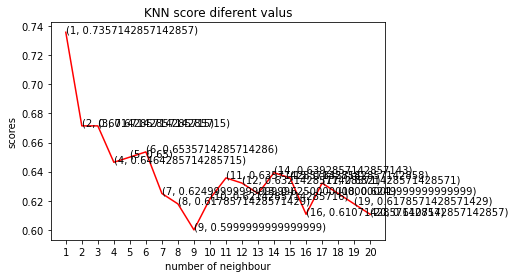

In [16]:
plt.plot([k for k in range(1,21)], knn_scores,color='red')
for i in range (1,21):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbour')
plt.ylabel('scores')
plt.title('KNN score diferent valus')

In [17]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',n_jobs=-1,
                                      weights='distance')

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [19]:
ypred=knn.predict(x_test)
print('acc : ',accuracy_score(y_test,ypred))

acc :  0.7333333333333333


In [20]:
sfs = SFS(knn,
        k_features=24,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=5,
        n_jobs=-1)

In [21]:
sfs=sfs.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    3.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.5s finished

[2021-01-28 13:47:27] Features: 1/24 -- score: 0.825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2021-01-28 13:47:27] Features: 2/24 -- score: 0.9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2021-01-28 13:47:27] Features: 3/24 -- score: 0.9285714285714285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s rema

In [22]:
sfs1 = SFS(knn,
        k_features=6,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=5,
        n_jobs=-1)

In [23]:
sfs1=sfs1.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2021-01-28 13:47:30] Features: 1/6 -- score: 0.825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2021-01-28 13:47:30] Features: 2/6 -- score: 0.9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2021-01-28 13:47:30] Features: 3/6 -- score: 0.9285714285714285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaini

In [24]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.7678571428571429, 0.8928571428571429, 0.803...",0.825,"(hemo,)",0.0531369,0.0413423,0.0206711
2,"(3, 14)","[0.8035714285714286, 0.9285714285714286, 0.928...",0.9,"(al, hemo)",0.0626037,0.0487078,0.0243539
3,"(3, 14, 19)","[0.8392857142857143, 0.9642857142857143, 0.946...",0.928571,"(al, hemo, dm)",0.0580635,0.0451754,0.0225877
4,"(2, 3, 14, 19)","[0.8571428571428571, 0.9642857142857143, 0.946...",0.935714,"(sg, al, hemo, dm)",0.0515263,0.0400892,0.0200446
5,"(2, 3, 14, 19, 21)","[0.8928571428571429, 0.9821428571428571, 0.928...",0.942857,"(sg, al, hemo, dm, appet)",0.0394875,0.0307226,0.0153613
6,"(2, 3, 14, 18, 19, 21)","[0.8928571428571429, 0.9821428571428571, 0.946...",0.95,"(sg, al, hemo, htn, dm, appet)",0.042071,0.0327327,0.0163663


In [25]:
sfs1.k_feature_idx_

(2, 3, 14, 18, 19, 21)

In [26]:
xtrain_fs=sfs1.transform(x_train)
xtest_fs=sfs1.transform(x_test)

In [27]:
knn.fit(xtrain_fs,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [28]:
ypred=knn.predict(xtest_fs)
print('acc : ',accuracy_score(y_test,ypred)*100)

acc :  98.33333333333333


SEMUA DATA

In [29]:
knn1 = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',n_jobs=-1,
                                      weights='distance')
knn1.fit(x,y)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [30]:
sfs2 = SFS(knn1,
        k_features=24,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=10,
        n_jobs=-1)

In [31]:
sfs2=sfs2.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2021-01-28 13:47:32] Features: 1/24 -- score: 0.875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2021-01-28 13:47:32] Features: 2/24 -- score: 0.925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2021-01-28 13:47:32] Features: 3/24 -- score: 0.95[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.

In [32]:
sfs3 = SFS(knn1,
        k_features=8,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=10,
        n_jobs=-1)

In [33]:
sfs3=sfs3.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2021-01-28 13:47:38] Features: 1/8 -- score: 0.875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2021-01-28 13:47:38] Features: 2/8 -- score: 0.925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.3s finished

[2021-01-28 13:47:39] Features: 3/8 -- score: 0.95[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.2s


In [34]:
pd.DataFrame.from_dict(sfs3.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.95, 0.85, 0.85, 0.9, 0.85, 0.85, 0.9, 0.85,...",0.875,"(hemo,)",0.0249113,0.033541,0.0111803
2,"(3, 14)","[0.95, 0.925, 0.9, 0.95, 0.925, 0.875, 0.925, ...",0.925,"(al, hemo)",0.0234866,0.0316228,0.0105409
3,"(3, 14, 19)","[0.975, 0.95, 0.975, 0.975, 0.9, 0.925, 0.975,...",0.95,"(al, hemo, dm)",0.0185678,0.025,0.00833333
4,"(3, 14, 19, 21)","[1.0, 0.95, 0.95, 1.0, 0.925, 0.975, 1.0, 0.95...",0.9625,"(al, hemo, dm, appet)",0.0207595,0.0279508,0.00931695
5,"(3, 4, 14, 19, 21)","[1.0, 0.95, 1.0, 1.0, 0.925, 1.0, 1.0, 0.95, 0...",0.97,"(al, su, hemo, dm, appet)",0.0231912,0.031225,0.0104083
6,"(2, 3, 4, 14, 19, 21)","[1.0, 0.95, 1.0, 1.0, 0.925, 1.0, 1.0, 0.95, 0...",0.97,"(sg, al, su, hemo, dm, appet)",0.0231912,0.031225,0.0104083
7,"(2, 3, 4, 7, 14, 19, 21)","[1.0, 0.95, 1.0, 1.0, 0.925, 1.0, 1.0, 0.95, 0...",0.97,"(sg, al, su, pcc, hemo, dm, appet)",0.0231912,0.031225,0.0104083
8,"(2, 3, 4, 7, 8, 14, 19, 21)","[1.0, 0.95, 1.0, 1.0, 0.925, 1.0, 1.0, 0.95, 0...",0.97,"(sg, al, su, pcc, ba, hemo, dm, appet)",0.0231912,0.031225,0.0104083
